In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
#build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.']=0
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [48]:
#build the dataset 
block_size = 3 #context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:
    #print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '---->', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)


In [49]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [7]:
# a lookup table C of 27 chars (rows) and 2 dims (cols)
C = torch.randn((27, 2))

In [8]:
C

tensor([[-0.4929,  0.5587],
        [ 0.2836, -0.0873],
        [ 2.3919, -0.3065],
        [-0.4931, -1.9993],
        [-0.8583, -0.6869],
        [ 0.9679,  0.5838],
        [-0.4697,  0.6395],
        [-1.1965,  2.0461],
        [ 1.2310,  1.1650],
        [ 0.1863, -1.6456],
        [-0.0344,  0.2566],
        [-0.1418,  1.3458],
        [ 1.1795, -0.5965],
        [ 0.1141, -0.2330],
        [-1.0684,  0.0442],
        [-0.2510,  0.9392],
        [ 0.2029,  0.4048],
        [-0.7551,  0.3314],
        [-0.2872,  0.4578],
        [ 1.1106, -0.4592],
        [ 0.7007, -0.9032],
        [-1.2883, -1.2844],
        [ 0.7395,  0.2202],
        [ 1.8150, -0.9161],
        [-0.3520,  0.7542],
        [-1.1711,  0.5103],
        [ 0.6115, -1.2917]])

In [9]:
# 2 ways to find embedding for 5th letter, either C[5] else find one hot of 5 wrt 27 and then multiply with C (generic)
print(C[5])
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([0.9679, 0.5838])


tensor([0.9679, 0.5838])

In [10]:
C[X]

tensor([[[-0.4929,  0.5587],
         [-0.4929,  0.5587],
         [-0.4929,  0.5587]],

        [[-0.4929,  0.5587],
         [-0.4929,  0.5587],
         [ 0.9679,  0.5838]],

        [[-0.4929,  0.5587],
         [ 0.9679,  0.5838],
         [ 0.1141, -0.2330]],

        [[ 0.9679,  0.5838],
         [ 0.1141, -0.2330],
         [ 0.1141, -0.2330]],

        [[ 0.1141, -0.2330],
         [ 0.1141, -0.2330],
         [ 0.2836, -0.0873]],

        [[-0.4929,  0.5587],
         [-0.4929,  0.5587],
         [-0.4929,  0.5587]],

        [[-0.4929,  0.5587],
         [-0.4929,  0.5587],
         [-0.2510,  0.9392]],

        [[-0.4929,  0.5587],
         [-0.2510,  0.9392],
         [ 1.1795, -0.5965]],

        [[-0.2510,  0.9392],
         [ 1.1795, -0.5965],
         [ 0.1863, -1.6456]],

        [[ 1.1795, -0.5965],
         [ 0.1863, -1.6456],
         [ 0.7395,  0.2202]],

        [[ 0.1863, -1.6456],
         [ 0.7395,  0.2202],
         [ 0.1863, -1.6456]],

        [[ 0.7395,  0

In [11]:
C[X].shape

torch.Size([32, 3, 2])

In [12]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [13]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [14]:
emb @ W1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [15]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([32, 6])

In [16]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [17]:
emb.view(32, 6)

tensor([[-0.4929,  0.5587, -0.4929,  0.5587, -0.4929,  0.5587],
        [-0.4929,  0.5587, -0.4929,  0.5587,  0.9679,  0.5838],
        [-0.4929,  0.5587,  0.9679,  0.5838,  0.1141, -0.2330],
        [ 0.9679,  0.5838,  0.1141, -0.2330,  0.1141, -0.2330],
        [ 0.1141, -0.2330,  0.1141, -0.2330,  0.2836, -0.0873],
        [-0.4929,  0.5587, -0.4929,  0.5587, -0.4929,  0.5587],
        [-0.4929,  0.5587, -0.4929,  0.5587, -0.2510,  0.9392],
        [-0.4929,  0.5587, -0.2510,  0.9392,  1.1795, -0.5965],
        [-0.2510,  0.9392,  1.1795, -0.5965,  0.1863, -1.6456],
        [ 1.1795, -0.5965,  0.1863, -1.6456,  0.7395,  0.2202],
        [ 0.1863, -1.6456,  0.7395,  0.2202,  0.1863, -1.6456],
        [ 0.7395,  0.2202,  0.1863, -1.6456,  0.2836, -0.0873],
        [-0.4929,  0.5587, -0.4929,  0.5587, -0.4929,  0.5587],
        [-0.4929,  0.5587, -0.4929,  0.5587,  0.2836, -0.0873],
        [-0.4929,  0.5587,  0.2836, -0.0873,  0.7395,  0.2202],
        [ 0.2836, -0.0873,  0.7395,  0.2

In [18]:
h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)

In [19]:
h

tensor([[-0.2539, -0.3246,  0.8302,  ...,  0.4507, -0.7591,  0.9576],
        [ 0.0377, -0.9428, -0.1702,  ..., -0.2552,  0.8269,  0.9730],
        [ 0.0513, -0.9282,  0.8308,  ..., -0.4890, -0.8941,  0.9966],
        ...,
        [ 0.3236, -0.9929, -0.8727,  ..., -0.9044,  0.7864,  0.9909],
        [ 0.8581, -0.5925,  0.9992,  ..., -0.7929, -0.8770,  0.9952],
        [ 0.9995,  0.9996,  0.9170,  ...,  0.0765,  0.5357,  0.9790]])

In [20]:
h.shape

torch.Size([32, 100])

In [21]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [22]:
logits = h @ W2 + b2

In [23]:
logits.shape

torch.Size([32, 27])

In [24]:
counts = logits.exp()

In [25]:
counts.shape

torch.Size([32, 27])

In [26]:
prob = counts / counts.sum(1, keepdims=True)

In [27]:
prob.shape

torch.Size([32, 27])

In [29]:
prob[0].sum()

tensor(1.)

In [28]:
loss = - prob[torch.arange(32), Y].log().mean()
loss

tensor(16.4232)

## making it respectable

In [84]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [113]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, W2, b1, b2]

In [114]:
sum(p.nelement() for p in parameters)

3481

Forward pass

In [35]:
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
# counts = logits.exp()
# prob = counts / counts.sum(1, keepdim=True)
# loss = -prob[torch.arange(32), Y].log().mean()
# loss

In [36]:
F.cross_entropy(logits, Y)

tensor(17.7697)

See why cross_entropy is important!! 3 reasons (exluding offsetting)

In [37]:
#backward pass
for p in parameters:
    p.grad = None
loss.backward()

#update
for p in parameters:
    p.data += -0.1 * p.grad

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [115]:
for p in parameters:
    p.requires_grad = True

In [116]:
lre = torch.linspace(-3, 0, 10000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010,  ..., 0.9986, 0.9993, 1.0000])

In [120]:
lri = []
lossi= []
for i in range(10000):
    #miinibatch construct
    ix = torch.randint(0, X.shape[0], (32,))
    #forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    print(loss)
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    for p in parameters:
        p.data += -0.01 * p.grad

    #track stats
    lri.append(i)
    lossi.append(loss.item())


tensor(2.6613, grad_fn=<NllLossBackward0>)
tensor(2.3425, grad_fn=<NllLossBackward0>)
tensor(2.5495, grad_fn=<NllLossBackward0>)
tensor(2.6180, grad_fn=<NllLossBackward0>)
tensor(2.0789, grad_fn=<NllLossBackward0>)
tensor(2.4539, grad_fn=<NllLossBackward0>)
tensor(2.6955, grad_fn=<NllLossBackward0>)
tensor(1.9710, grad_fn=<NllLossBackward0>)
tensor(2.5676, grad_fn=<NllLossBackward0>)
tensor(2.2780, grad_fn=<NllLossBackward0>)
tensor(2.3956, grad_fn=<NllLossBackward0>)
tensor(2.3998, grad_fn=<NllLossBackward0>)
tensor(2.5320, grad_fn=<NllLossBackward0>)
tensor(2.3372, grad_fn=<NllLossBackward0>)
tensor(2.0468, grad_fn=<NllLossBackward0>)
tensor(2.7874, grad_fn=<NllLossBackward0>)
tensor(2.5902, grad_fn=<NllLossBackward0>)
tensor(2.7202, grad_fn=<NllLossBackward0>)
tensor(2.3922, grad_fn=<NllLossBackward0>)
tensor(2.0044, grad_fn=<NllLossBackward0>)
tensor(2.6976, grad_fn=<NllLossBackward0>)
tensor(2.1421, grad_fn=<NllLossBackward0>)
tensor(2.1388, grad_fn=<NllLossBackward0>)
tensor(2.59

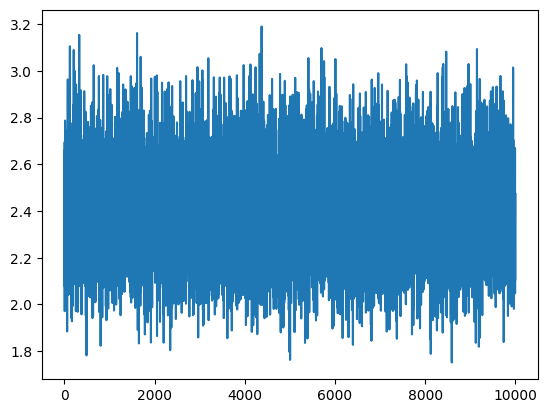

In [121]:
plt.plot(lri, lossi)

In [122]:
emb = C[X[ix]]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y[ix])
loss

tensor(2.0798, grad_fn=<NllLossBackward0>)